# CNN Inplementation

Inplemenmt the CNN using CNN. In this time, this program also implement dropout and data extension.

# CIFAR-10

import the CIFAR-10 using torchvision datasets. CIFAR os tje datasets that have 60 thoushand with labels. In this code, import the CIFAR-10 and plot the random 25 images.

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
number of data: 10000


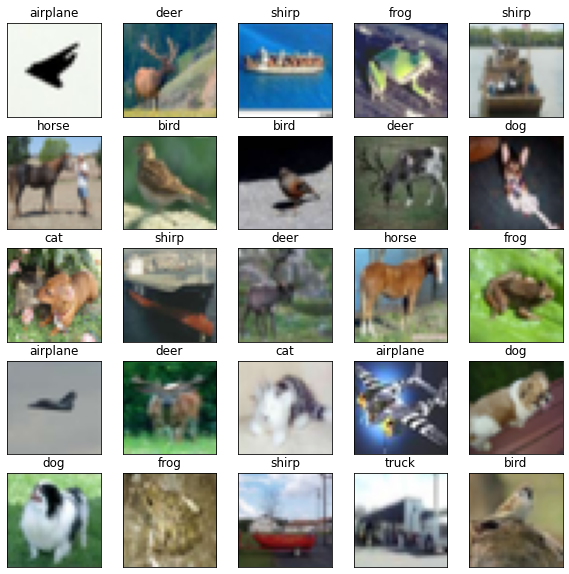

In [ ]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

cifar10_data = CIFAR10(root = "./data",
                       train = False,download=True,
                       transform = transforms.ToTensor())
cifar10_classes = np.array(["airplane","automobile","bird","cat","deer",
                            "dog","frog","horse","shirp","truck"])
print("number of data:" ,len(cifar10_data))

n_image = 25
cifar10_loader = DataLoader(cifar10_data,batch_size=n_image,shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)

plt.figure(figsize =(10,10)) # 画像の表示サイズ
for i in range(n_image):
  plt.subplot(5,5,i+1)
  plt.imshow(np.transpose(images[i],(1,2,0))) # moving back channel
  label = cifar10_classes[labels[i]]
  plt.title(label)
  plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False) # hidden the label and memory
plt.show()

# Data extend

Extend the data using torchvision.transforms. In this time, resize the images around the 0.8 - 1.2 and rotate the image around -30 - 30. These processing add to the original image when take out the batch.

Files already downloaded and verified
number of data:  10000


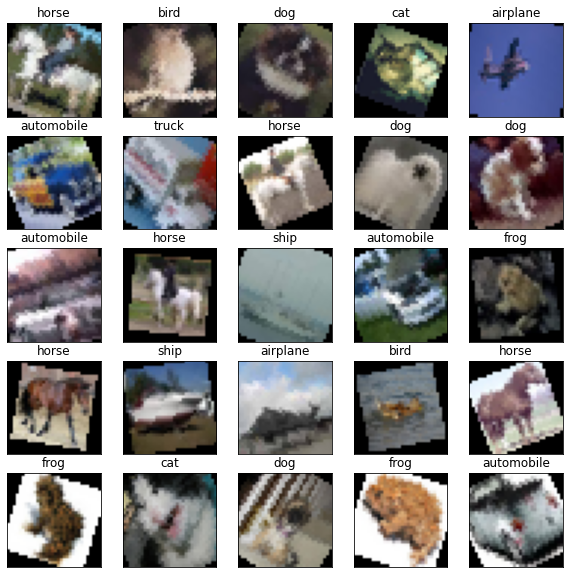

In [ ]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.RandomAffine([-30,30],scale=(0.8,1.2)), # rotate and resize
                                transforms.ToTensor()])
cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform = transform)
cifar10_classes = np.array(["airplane","automobile","bird","cat","deer",
                            "dog","frog","horse","ship","truck"])
print("number of data: ", len(cifar10_data))

n_image = 25
cifar10_loader = DataLoader(cifar10_data, batch_size = n_image,shuffle=True)
dataiter = iter(cifar10_loader) #itereta
images, labels = next(dataiter) # take out the first batch

plt.figure(figsize=(10,10))
for i in range(n_image):
  plt.subplot(5,5,i+1)
  plt.imshow(np.transpose(images[i],(1,2,0))) # move the chanel to the last
  label = cifar10_classes[labels[i]]
  plt.title(label)
  plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False)
plt.show()

# Data preprocessing

Implement the CNN. Resize , resize and flip holizontal for data extend. Set the average of input to 0 , stdv to 1. Set the bath size to the  sample number of original data. Because of this code doesn't adopt mini batch method to test data.

In [ ]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

affine = transforms.RandomAffine([-15,15], scale=(0.8,1.2)) # rotate and resize
flip = transforms.RandomHorizontalFlip(p=5) # flip horizontal
normalize = transforms.Normalize((0.0, 0.0, 0.0) , (1.0 , 1.0 , 1.0)) # average to 0 , stdv to 1
to_tensor = transforms.ToTensor()

transform_train = trainsforms.Compuse([affine, flip , to_tensor, normalize])
transform_test = transforms.Compuse([to_tensor , normalize])
cifar10_train = CIFAR10("./data", train=True, download=True,transform=transform_train)
cifar10_test = CIFAR10("./data", train=False,download=True,transform=transform_test)

#Setting of dataloader
batch_size = 64
train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(cifar10_test, batch_size = len(cifar10_test), shuffle = False)

# Model Building

Building the model as inheritance the nn.module. For this time, introduct the dropout for suppresses overlearning.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 畳み込み層:(入力チャンネル数, フィルタ数、フィルタサイズ)
        self.pool = nn.MaxPool2d(2, 2)  # プーリング層:（領域のサイズ, ストライド）
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 256)  # 全結合層
        self.dropout = nn.Dropout(p=0.5)  # ドロップアウト:(p=ドロップアウト率)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net()
net.cuda()  # GPU対応
print(net)

# Learning

Learning the model. Train and evaluate the model by take out the mini batch using DataLoader. In this time, calcurate the loss using the all of the testdata.

In [ ]:
from torch import optim

#公差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())

# loss of log
record_loss_train = []
record_loss_test = []

# Learning
x_test, t_test = next(iter(test_loader))
x_test, t_test = x_test.cuda(),t_test.cuda()
for i in range():
  net.train()
  loss_train = 0
  for j, (x,t) in enumerate(train_loader): #take out the minibatch(x,t)
    x,t = x.cuda(), t.cuda() # GPU対応
    y = net(x)
    loss = loss_fnc(y,t)
    loss_train += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  loss_train /= j+1
  record_loss_train.append(loss_train)

  net.eval() # evaluating mode
  y_test = net(x_test)
  loss_test = loss_fnc(y_test,t_test).item()
  record_loss_test.append(loss_test)

  if%1 == 0:
    print("Epoch:", i, "Loss_Train", loss_train, "Loss_Test:",loss_test)

# Error trends

plot the graph of error trends of test data and train data

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)),record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

# Correct rate

Input the image and check whether the model is working properly or not

In [ ]:
cifar10_loader = DataLoader(cifar10_test,batch_size=1,shuffle=True)
dataiter = iter(cifar10_loader)
images , labels = next(dataiter)

plt.imshow(np.transpose(images[0],(1,2,0)))
plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False)
plt.show()

net.eval()
x,t = images.cuda(), labels.cuda()
y = net(x)
print("Correct : " , cifar10_classes[labels[0]],
      "Predict result : ", cifar10_classes[y.argmax().item()])